# Import Required Libraries
Import libraries such as pandas for data manipulation and matplotlib/seaborn for visualization.

In [1]:
# Import Required Libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced visualizations
import geopandas as gpd

# Configure default plot style
sns.set(style="whitegrid")

# Load and Explore the Dataset
Load the CSV file into a pandas DataFrame and display basic information such as column names, data types, and a preview of the data.

In [2]:
# Load and Explore the Dataset

# Load the CSV file into a pandas DataFrame
file_path = '../../Data/slovakia/slovak_immigration_international.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows of the dataset
print("\nPreview of the Dataset:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198484 entries, 0 to 198483
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   citizen_country     198484 non-null  object
 1   citizen_ISO3        189303 non-null  object
 2   citizen_region      188412 non-null  object
 3   citizen_sub_region  188412 non-null  object
 4   age                 198484 non-null  object
 5   sex                 198484 non-null  object
 6   country             198484 non-null  object
 7   country_ISO3        198484 non-null  object
 8   year                198484 non-null  int64 
 9   count               198484 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 15.1+ MB
None

Preview of the Dataset:
  citizen_country citizen_ISO3 citizen_region citizen_sub_region    age  \
0         Andorra          AND         Europe    Southern Europe  TOTAL   
1         Andorra          AND         Europe    

# Total immigration to Slovakia

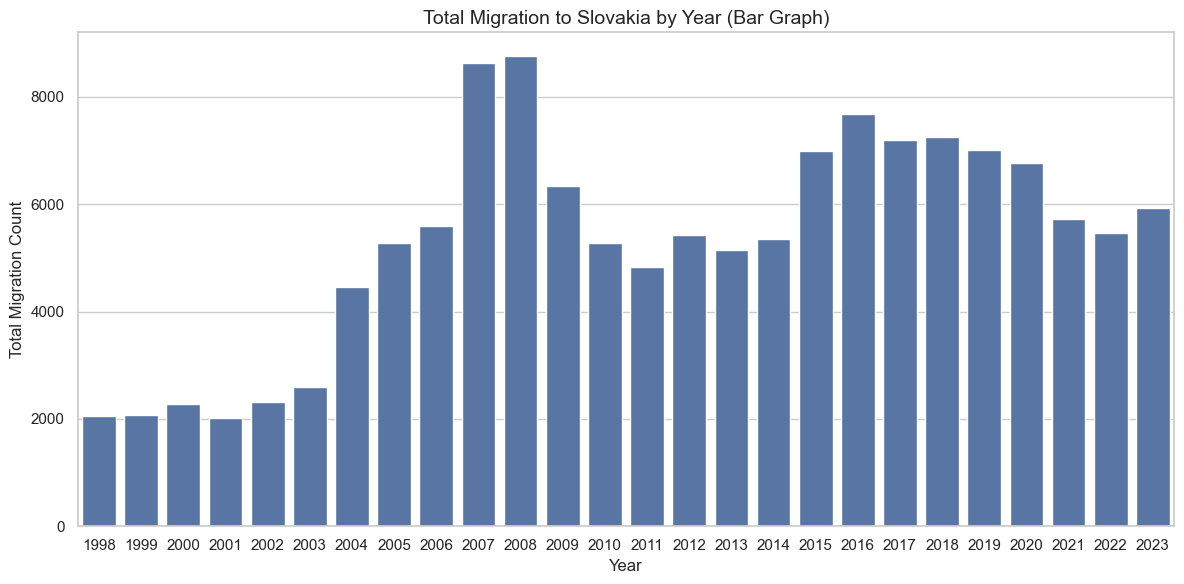

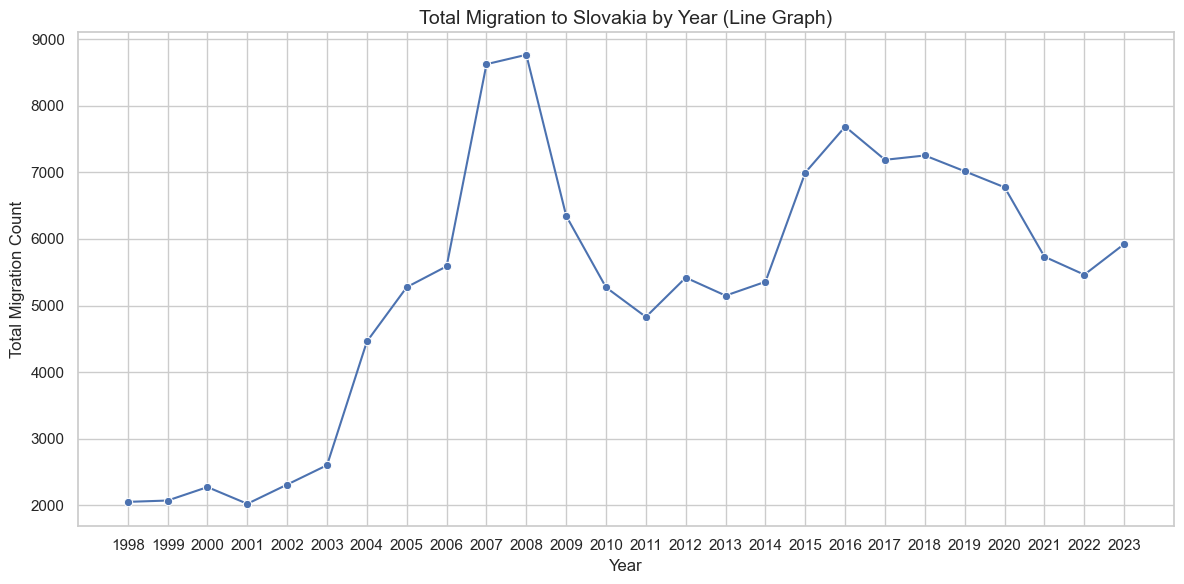

In [3]:
# Filter the dataset for Total sex, TOTAL age, and Total citizen_country
total_data = df[(df['sex'] == 'Total') & (df['age'] == 'TOTAL') & (df['citizen_country'] == 'Total')]

# Group by year and sum the migration counts
yearly_total_migration = total_data.groupby('year')['count'].sum().reset_index()

# Horizontal Bar Graph (Corrected to Vertical Bar Graph)
figure = plt.figure(figsize=(12, 6))
sns.barplot(
    data=yearly_total_migration,
    x='year',
    y='count',
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Migration Count', fontsize=12)
plt.title('Total Migration to Slovakia by Year (Bar Graph)', fontsize=14)
plt.tight_layout()
plt.show()

figure.savefig(f"../../Images/Slovakia/Migration/immigration/total_immigration_to_sk_bar.png", bbox_inches='tight')

# Line Graph
figure = plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_total_migration,
    x='year',
    y='count',
    marker='o',
    color='b'
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Migration Count', fontsize=12)
plt.title('Total Migration to Slovakia by Year (Line Graph)', fontsize=14)
plt.xticks(ticks=yearly_total_migration['year'])
plt.grid(True)
plt.tight_layout()
plt.show()

figure.savefig(f"../../Images/Slovakia/Migration/immigration/total_immigration_to_sk_line.png", bbox_inches='tight')

# Sort and Select Top 20 Countries
Sort the aggregated data in descending order by migration count and select the top 20 countries.

In [4]:
# Sort and Select Top 20 Countries

filtered_df = df[(df['sex'] == 'Total') & (df['age'] == 'TOTAL') & (df['citizen_country'] != 'Total')]
country_migration = filtered_df.groupby('citizen_country', as_index=False).agg({
    'count': 'sum',
    'citizen_sub_region': 'first',
    'citizen_ISO3': 'first'
})
country_migration = country_migration.sort_values(by='count', ascending=False)

# Sort the data in descending order of migration count and select the top 20 countries
top_20_countries = country_migration.head(20)

# Display the top 20 countries
display("Top 20 Countries by Migration to Slovakia (Excluding Total):")
display(top_20_countries)

'Top 20 Countries by Migration to Slovakia (Excluding Total):'

,citizen_country,count,citizen_sub_region,citizen_ISO3
186,Slovakia,48462,Eastern Europe,SVK
50,Czechia,8929,Eastern Europe,CZE
91,Hungary,8477,Eastern Europe,HUN
166,Romania,6521,Eastern Europe,ROU
162,Poland,3028,Eastern Europe,POL
216,Ukraine,2892,Eastern Europe,UKR
77,Germany,2811,Western Europe,DEU
100,Italy,2301,Southern Europe,ITA
30,Bulgaria,1671,Eastern Europe,BGR
218,United Kingdom,1669,Northern Europe,GBR


# Visualize the Top 20 Countries
Create a bar plot to visualize the top 20 countries with the highest migration counts to Slovakia.

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\2673971993.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


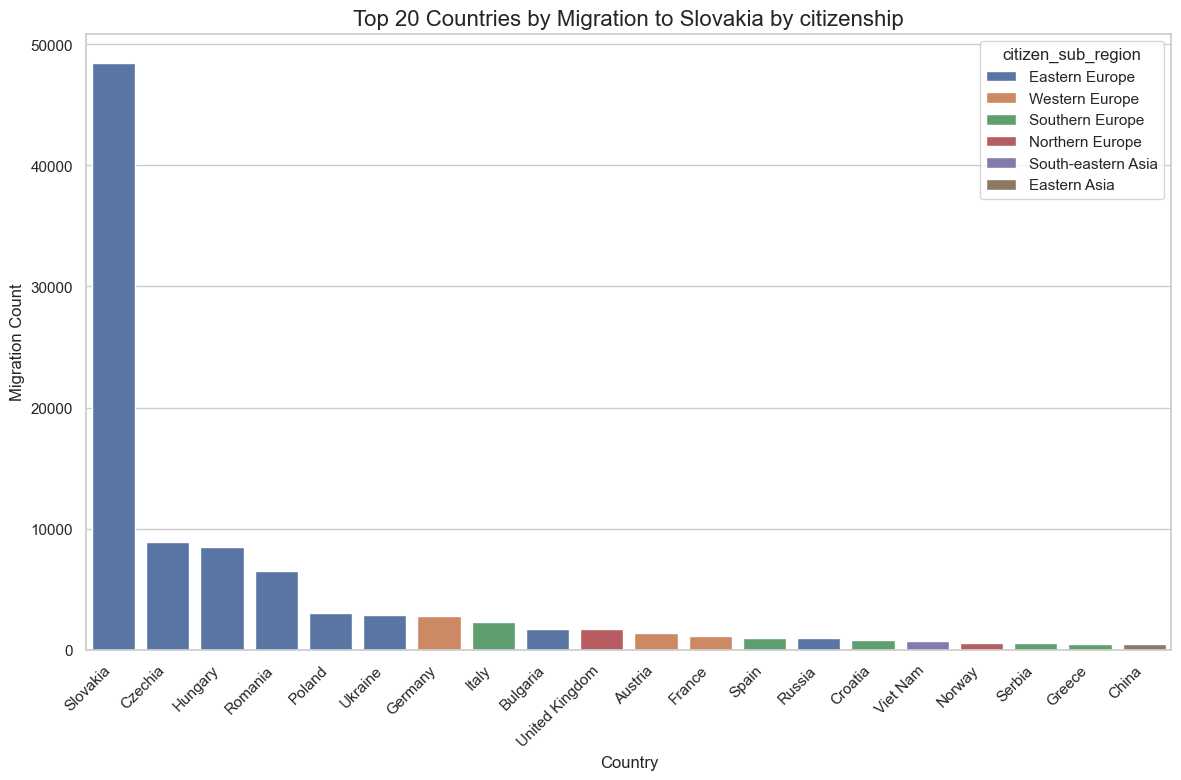

In [5]:
# Visualize the Top 20 Countries (Horizontal Bar Plot)
plt.figure(figsize=(14, 8))

axes = sns.barplot(
    data=top_20_countries,
    y='count',
    x='citizen_country',
    hue = 'citizen_sub_region'
)

# Add labels and title to the plot
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
axes.set_ylabel('Migration Count', fontsize=12)
axes.set_xlabel('Country', fontsize=12)
axes.set_title('Top 20 Countries by Migration to Slovakia by citizenship', fontsize=16)

figure.savefig(f"../../Images/Slovakia/Migration/immigration/top_immigration.png", bbox_inches='tight')

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\1600290086.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


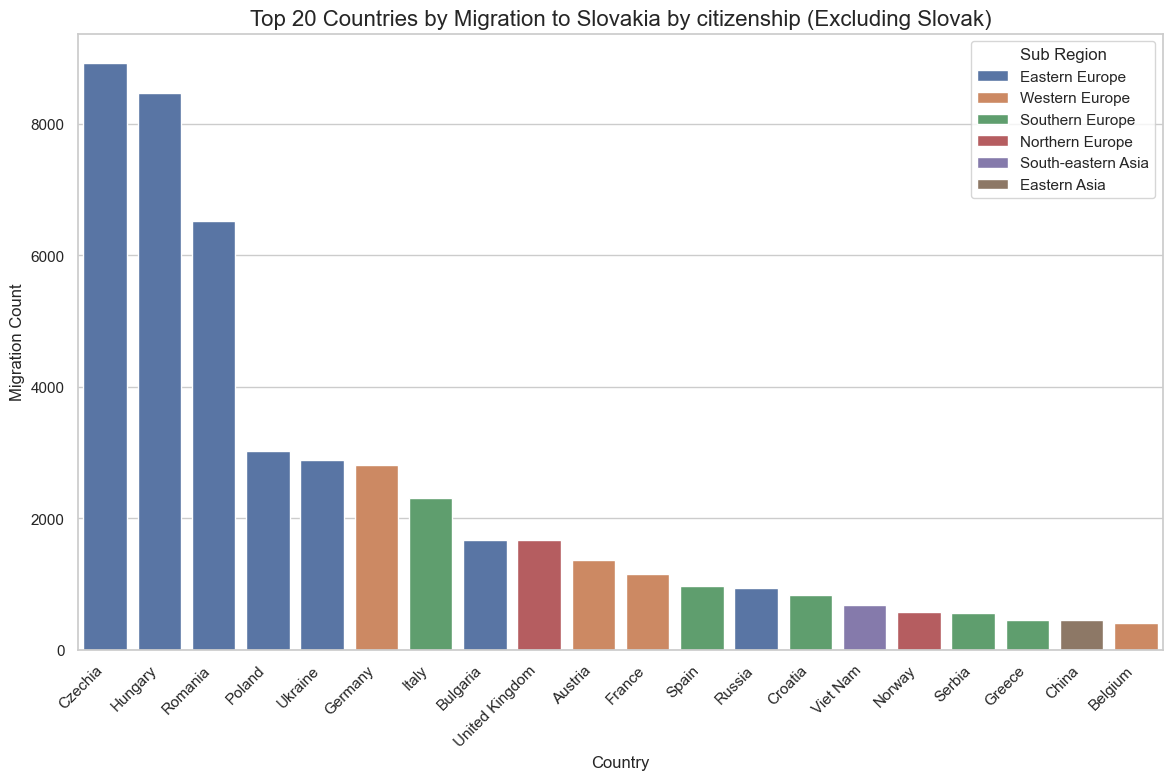

In [6]:
# Exclude Slovakia and ensure there are 20 countries
country_migration_no_slovakia = country_migration[country_migration['citizen_country'] != 'Slovakia']

# Sort the data in descending order of migration count and select the top 20 countries
top_20_countries_no_slovakia = country_migration_no_slovakia.head(20)

plt.figure(figsize=(14, 8))

# Visualize the Top 20 Countries (Vertical Bar Plot) excluding Slovakia
axes = sns.barplot(
    data=top_20_countries_no_slovakia,
    x='citizen_country',  # Country names on the x-axis
    y='count',  # Migration count on the y-axis
    hue = 'citizen_sub_region'  # Color by sub-region
)

# Rotate x-axis labels for better readability
# Rotate x-axis labels for better readability
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

# Add labels and title to the plot
axes.set_xlabel('Country', fontsize=12)
axes.set_ylabel('Migration Count', fontsize=12)
axes.set_title('Top 20 Countries by Migration to Slovakia by citizenship (Excluding Slovak)', fontsize=16)

axes.legend().set_title("Sub Region")

figure.savefig(f"../../Images/Slovakia/Migration/immigration/top_immigration_no_sk.png", bbox_inches='tight')

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


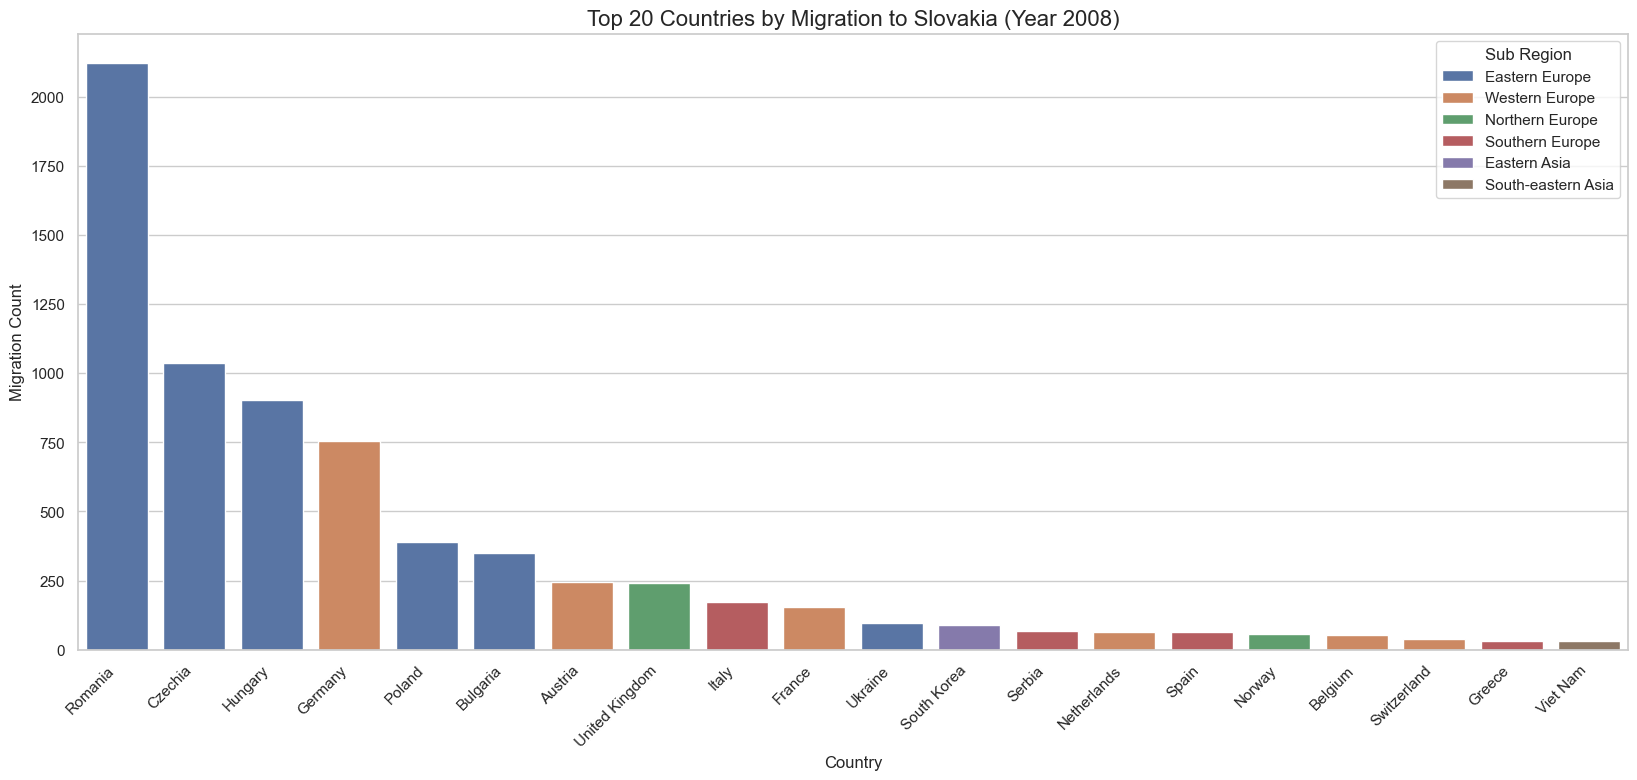

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


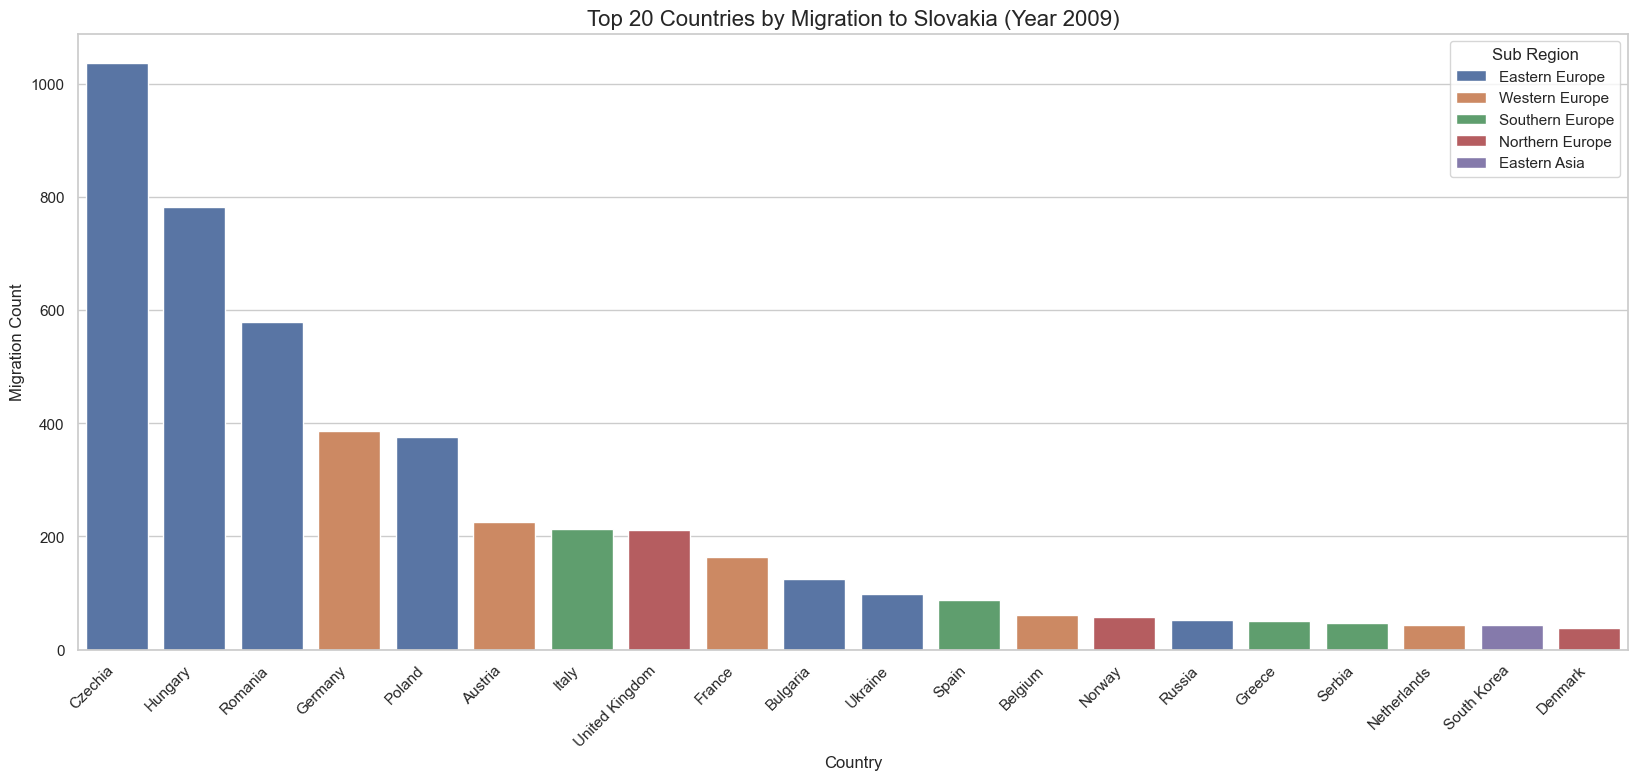

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


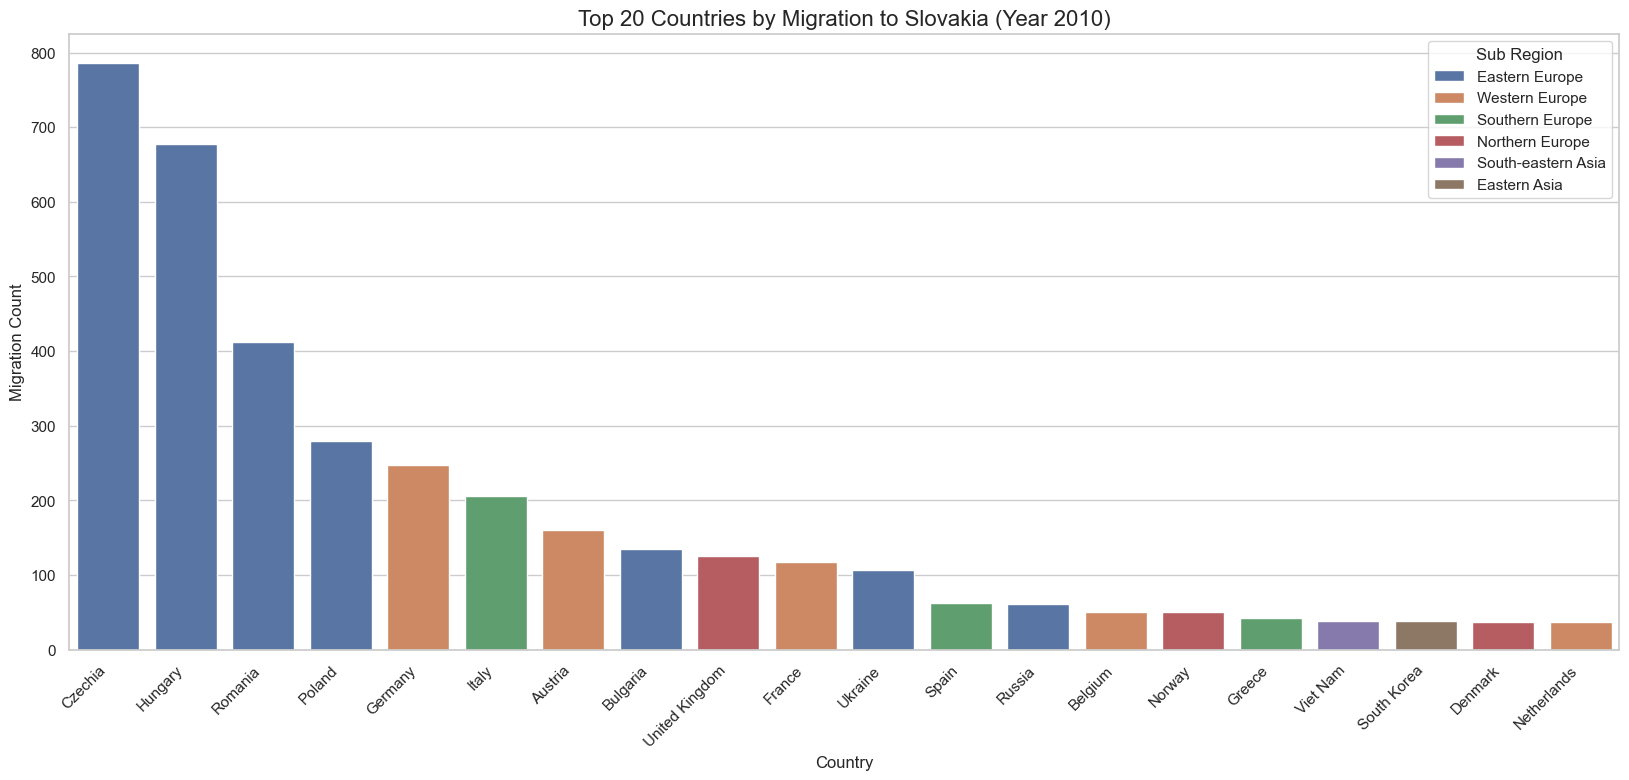

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


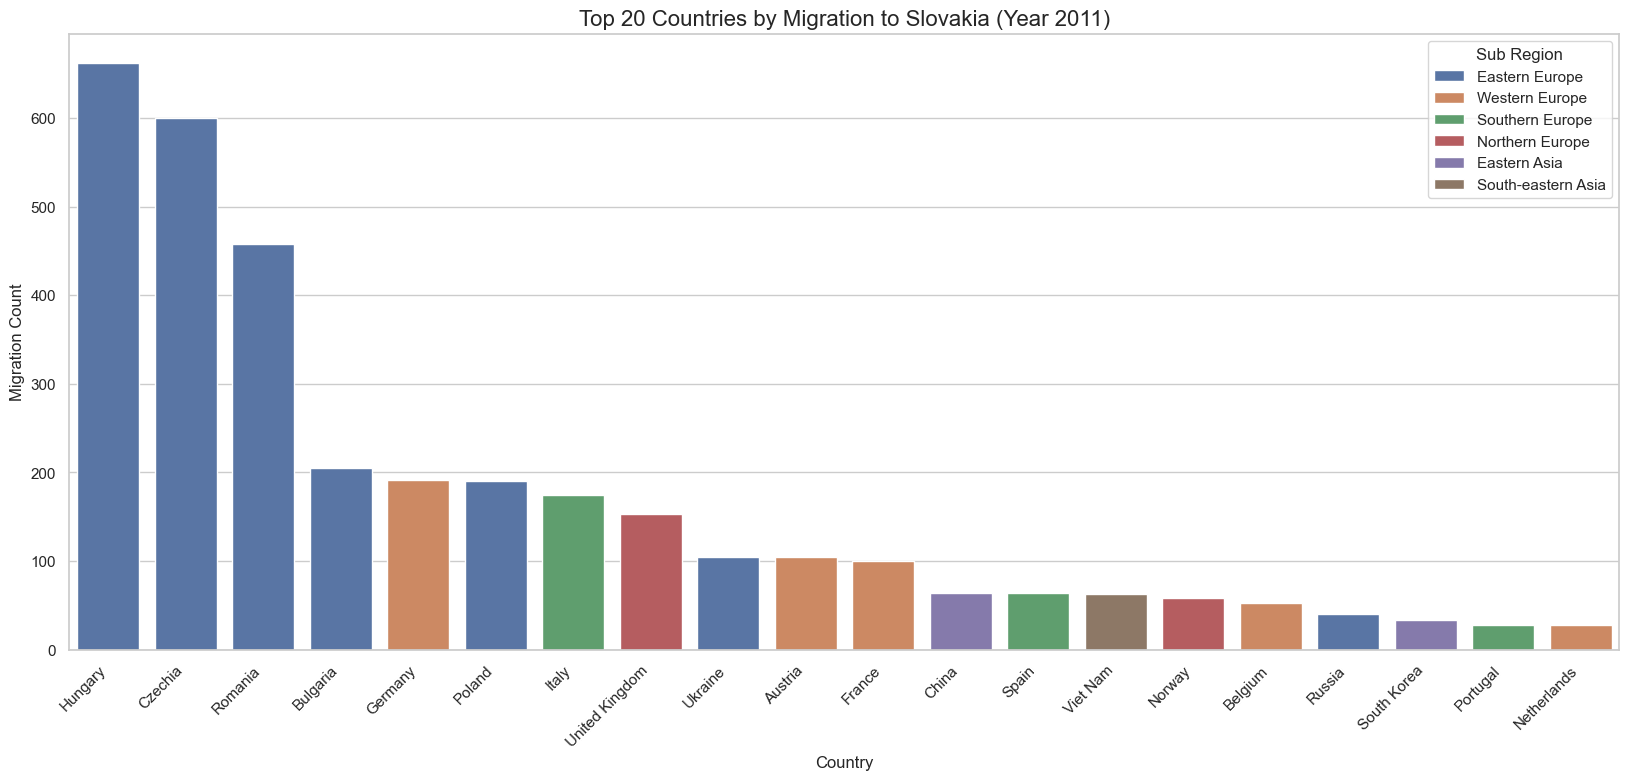

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


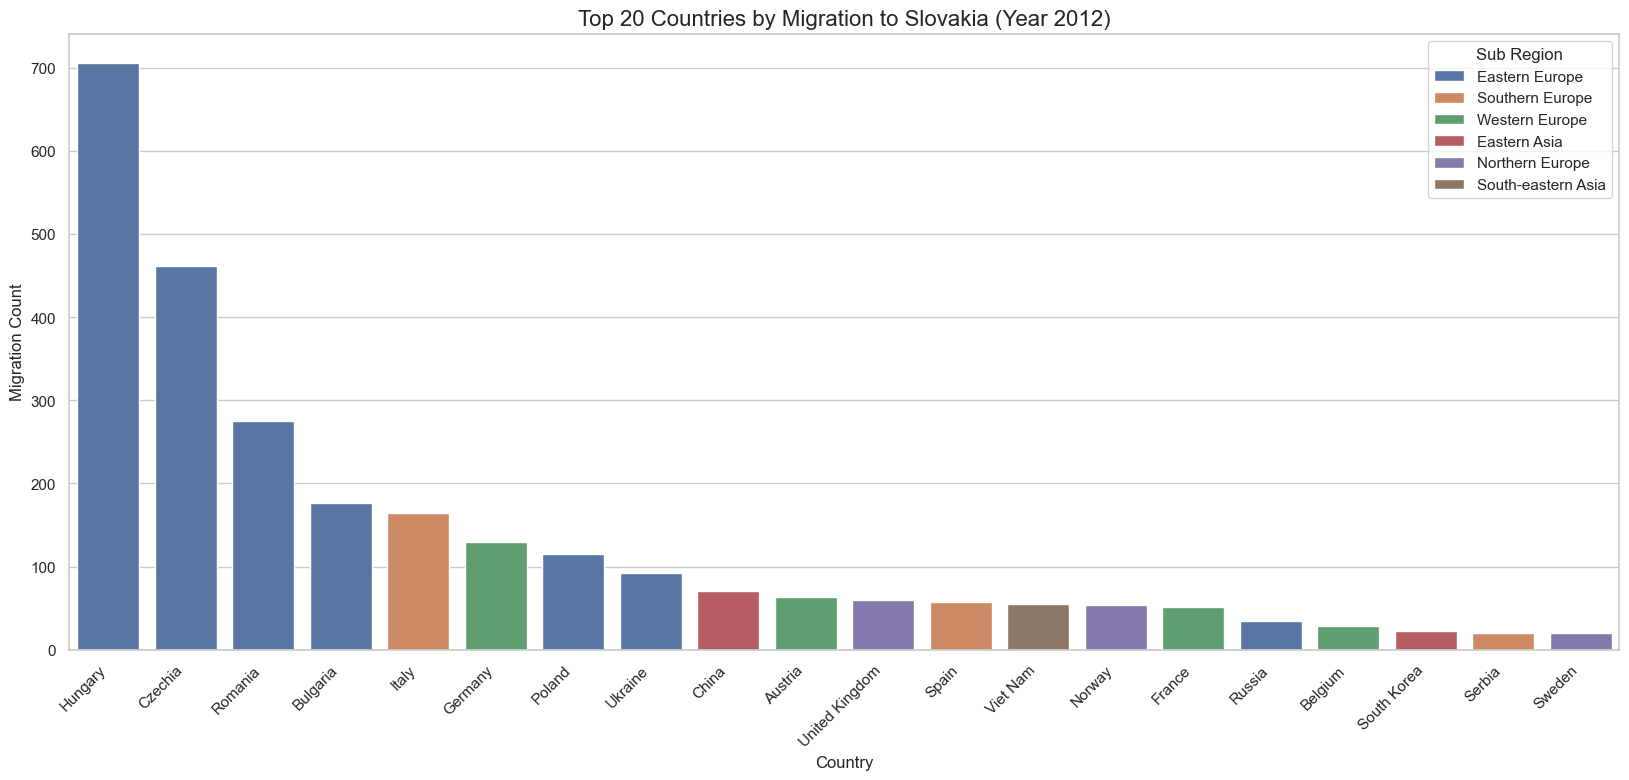

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


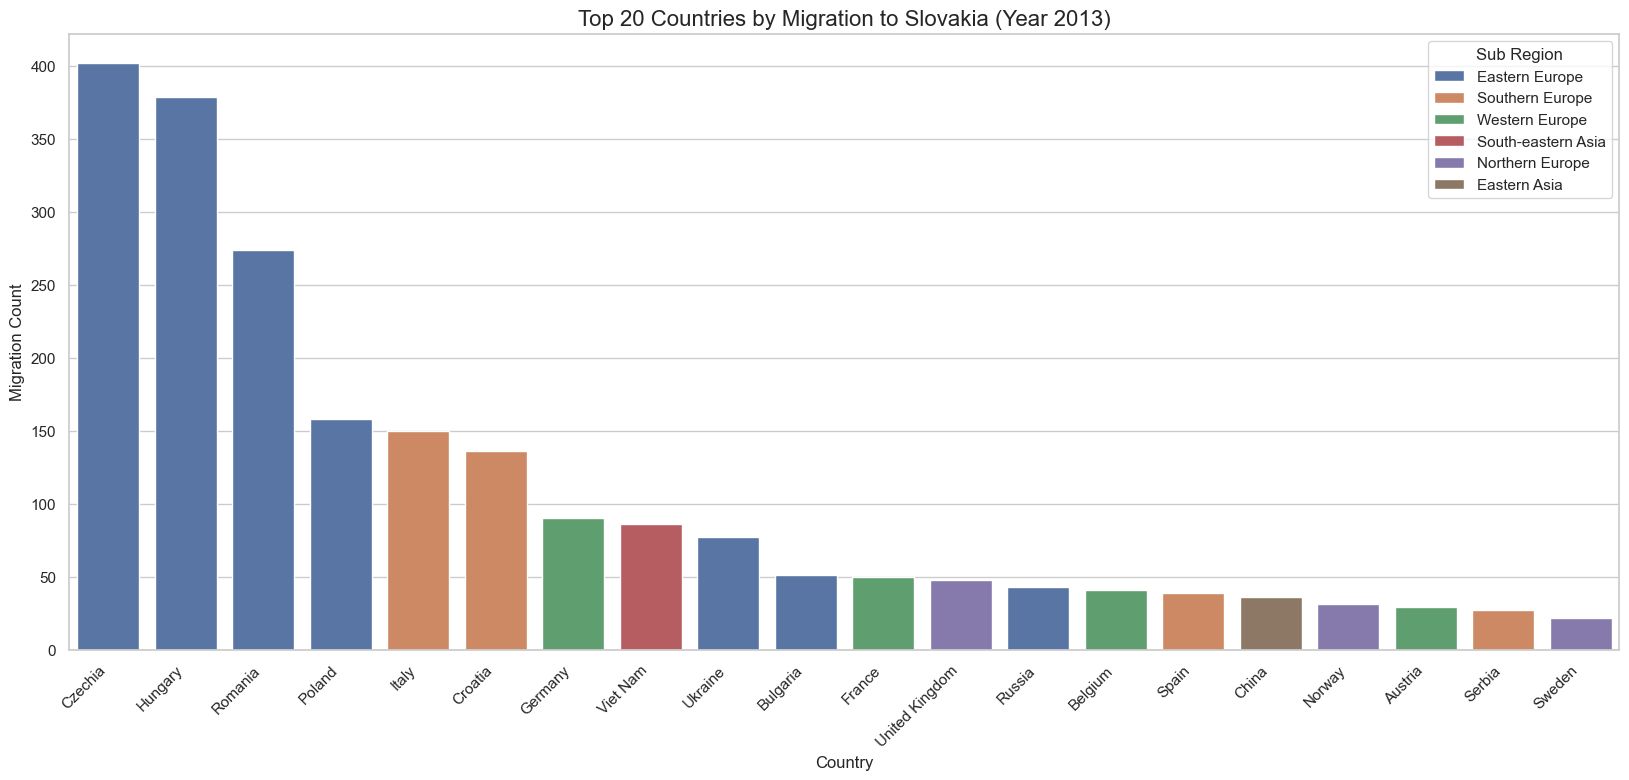

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


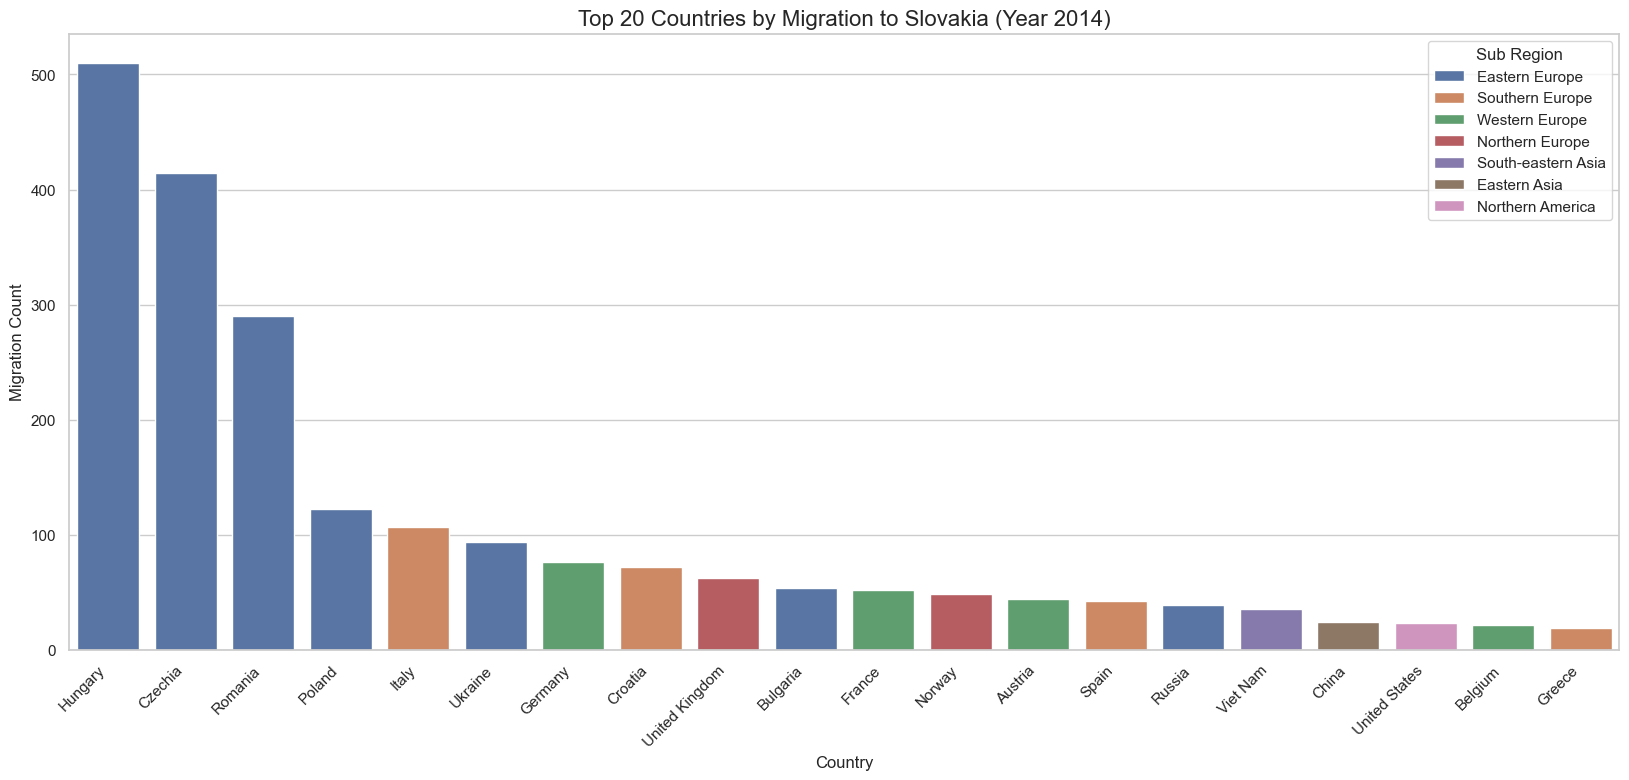

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


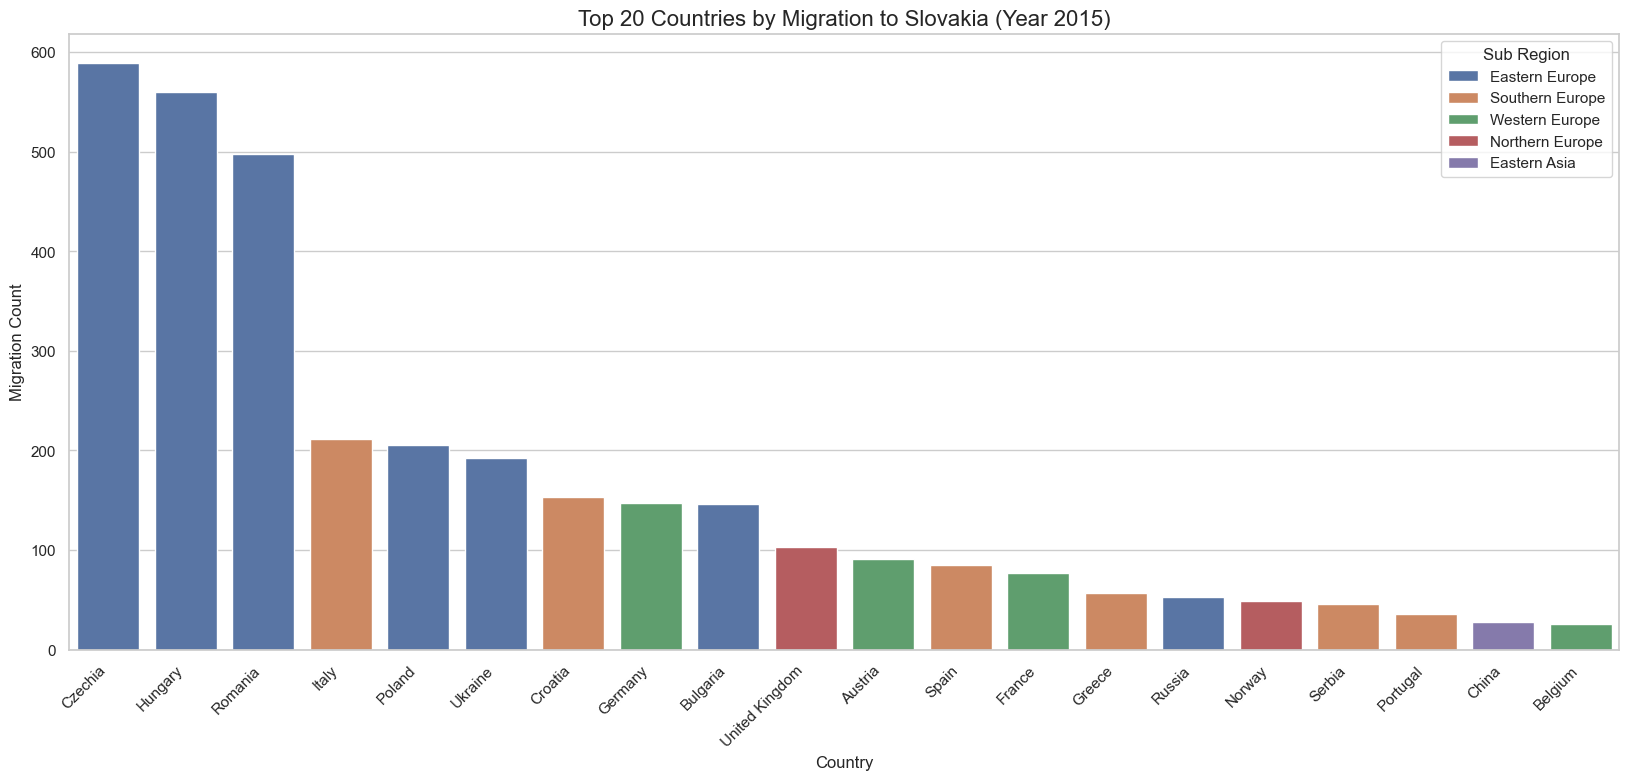

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


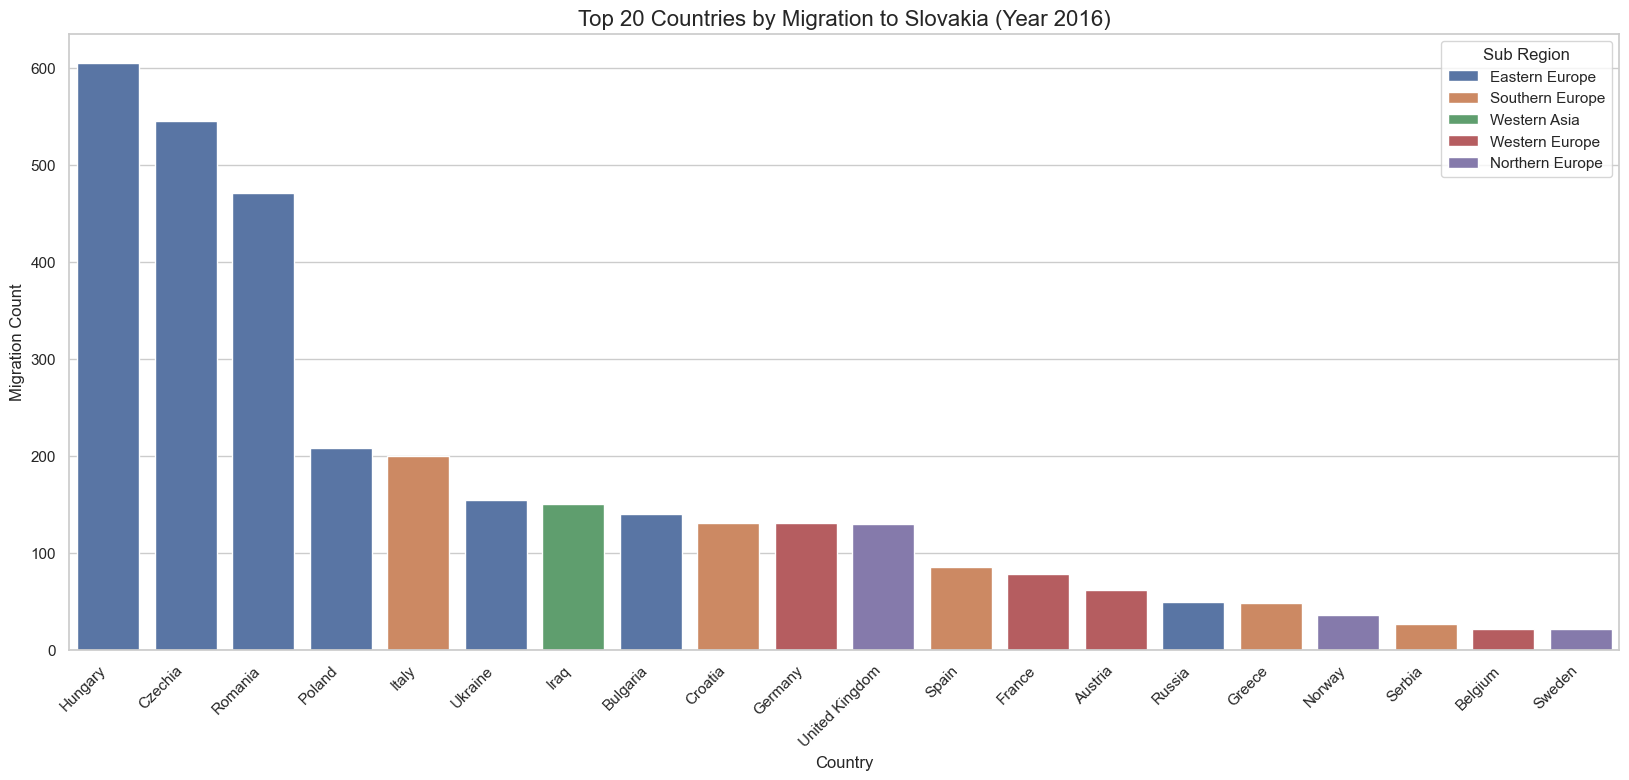

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


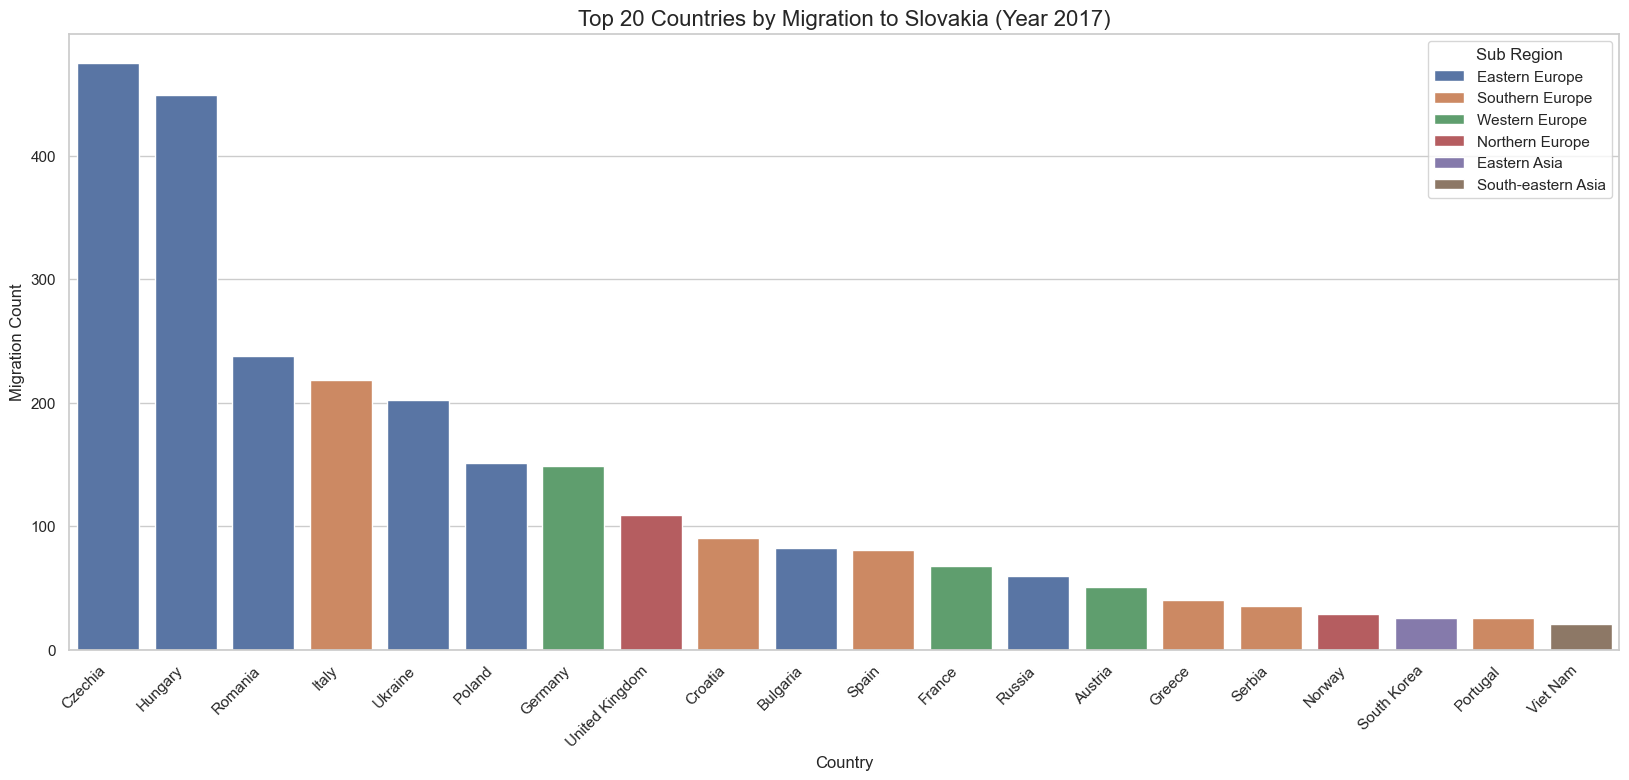

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


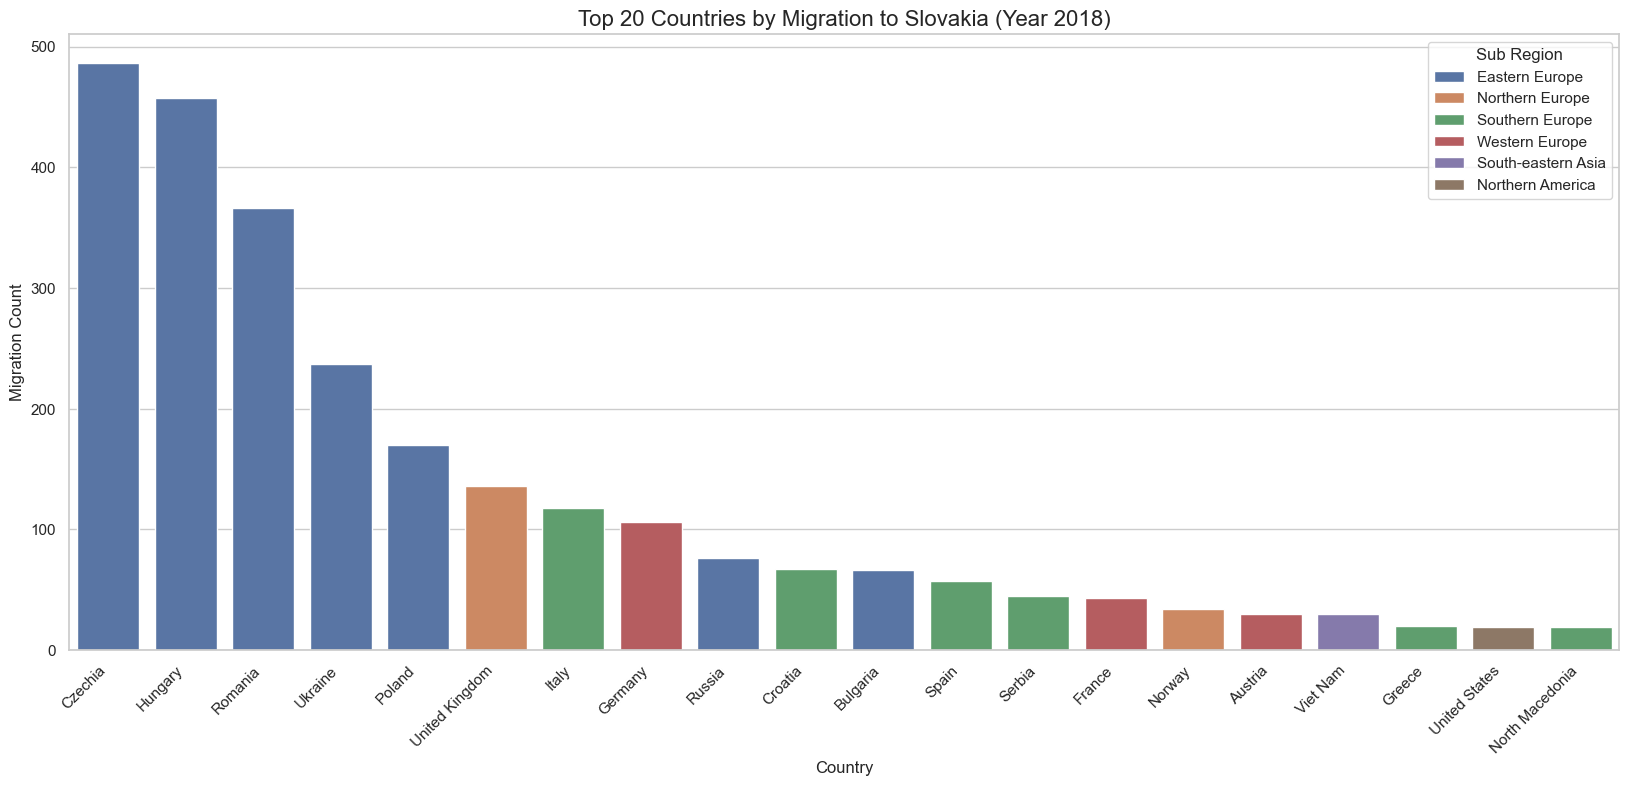

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


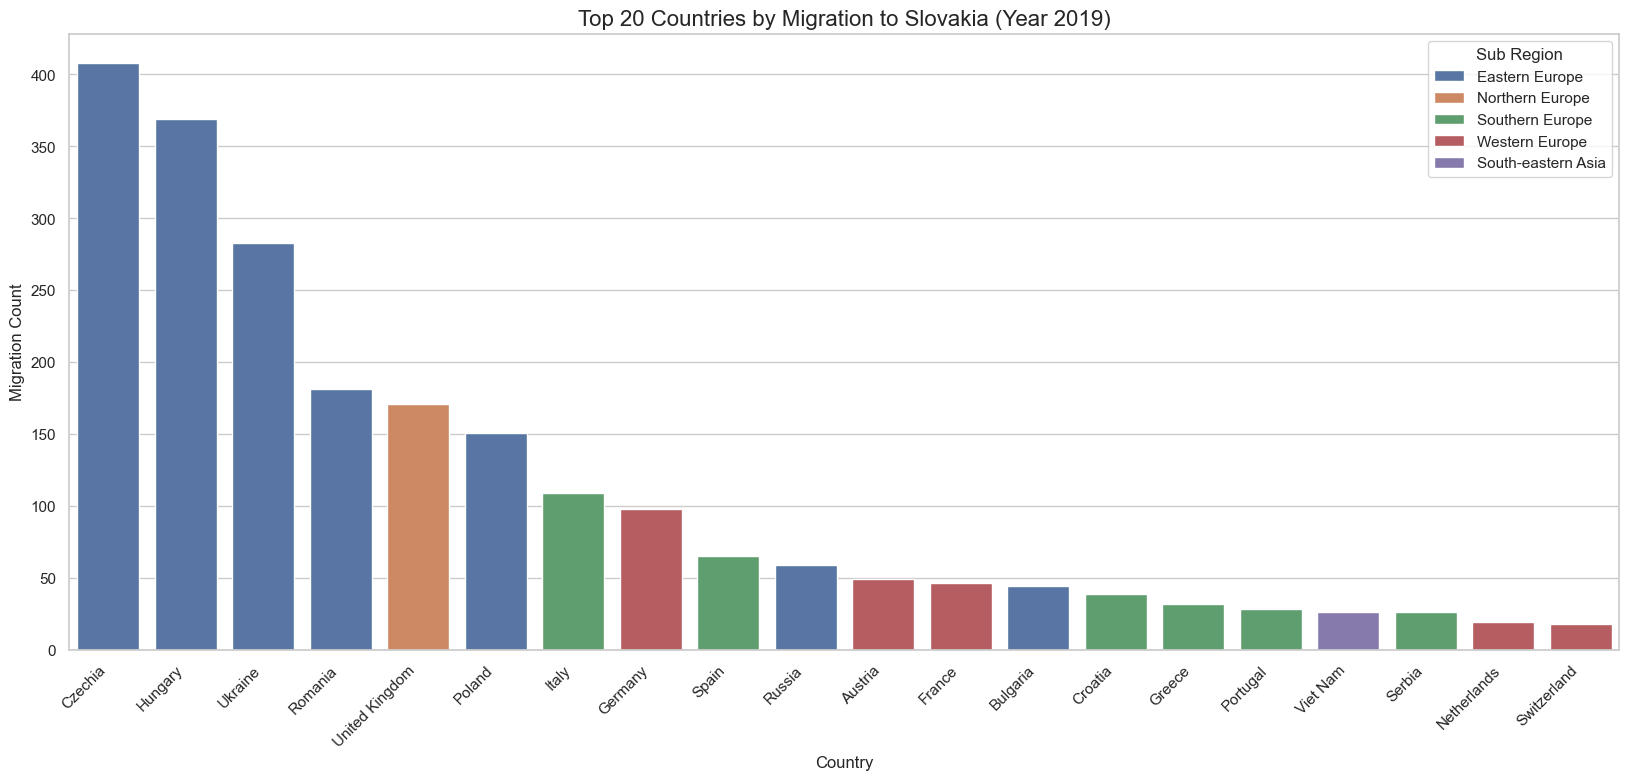

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


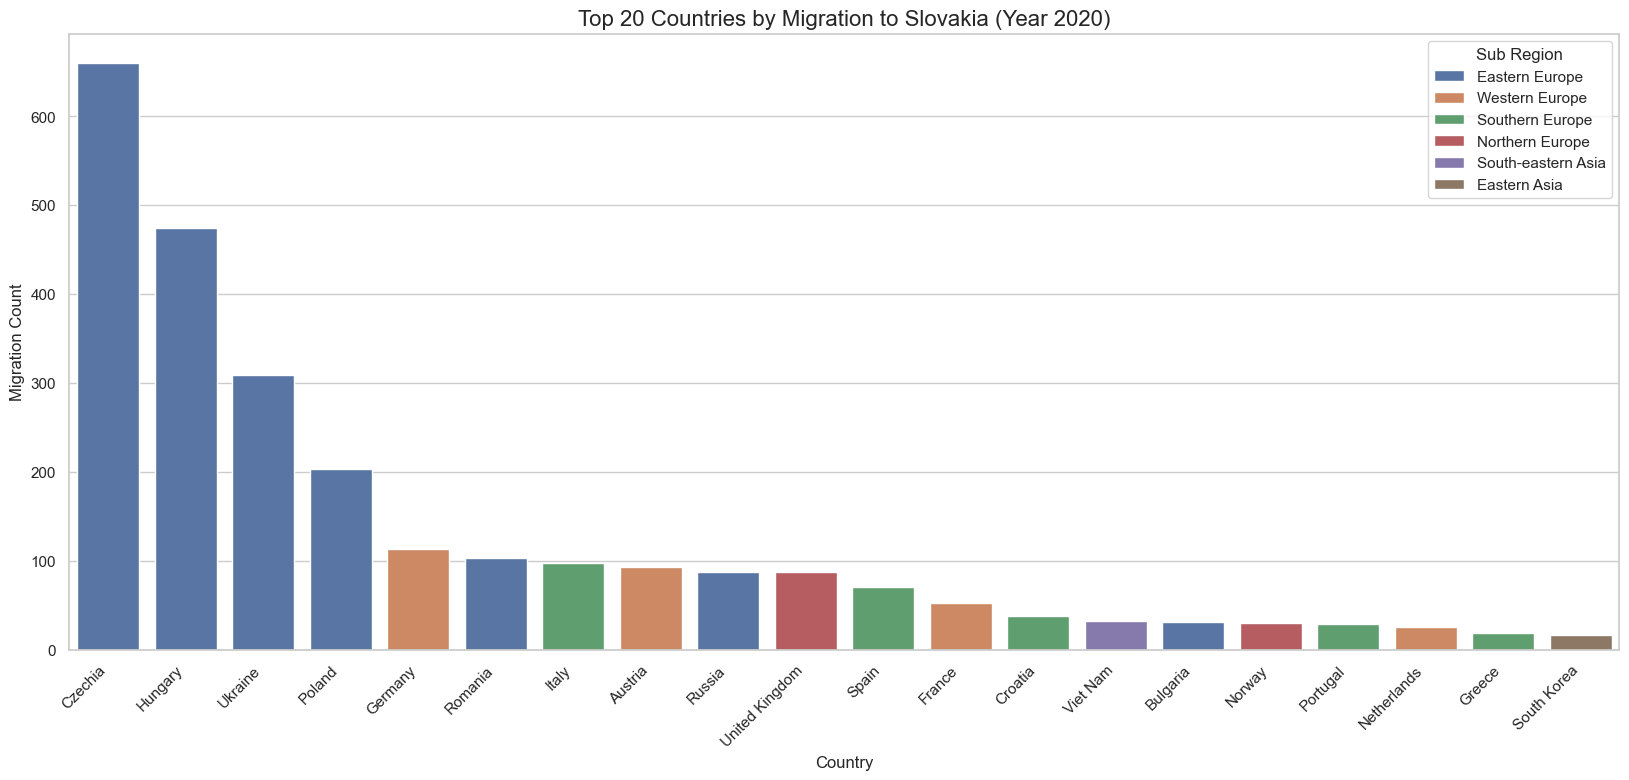

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


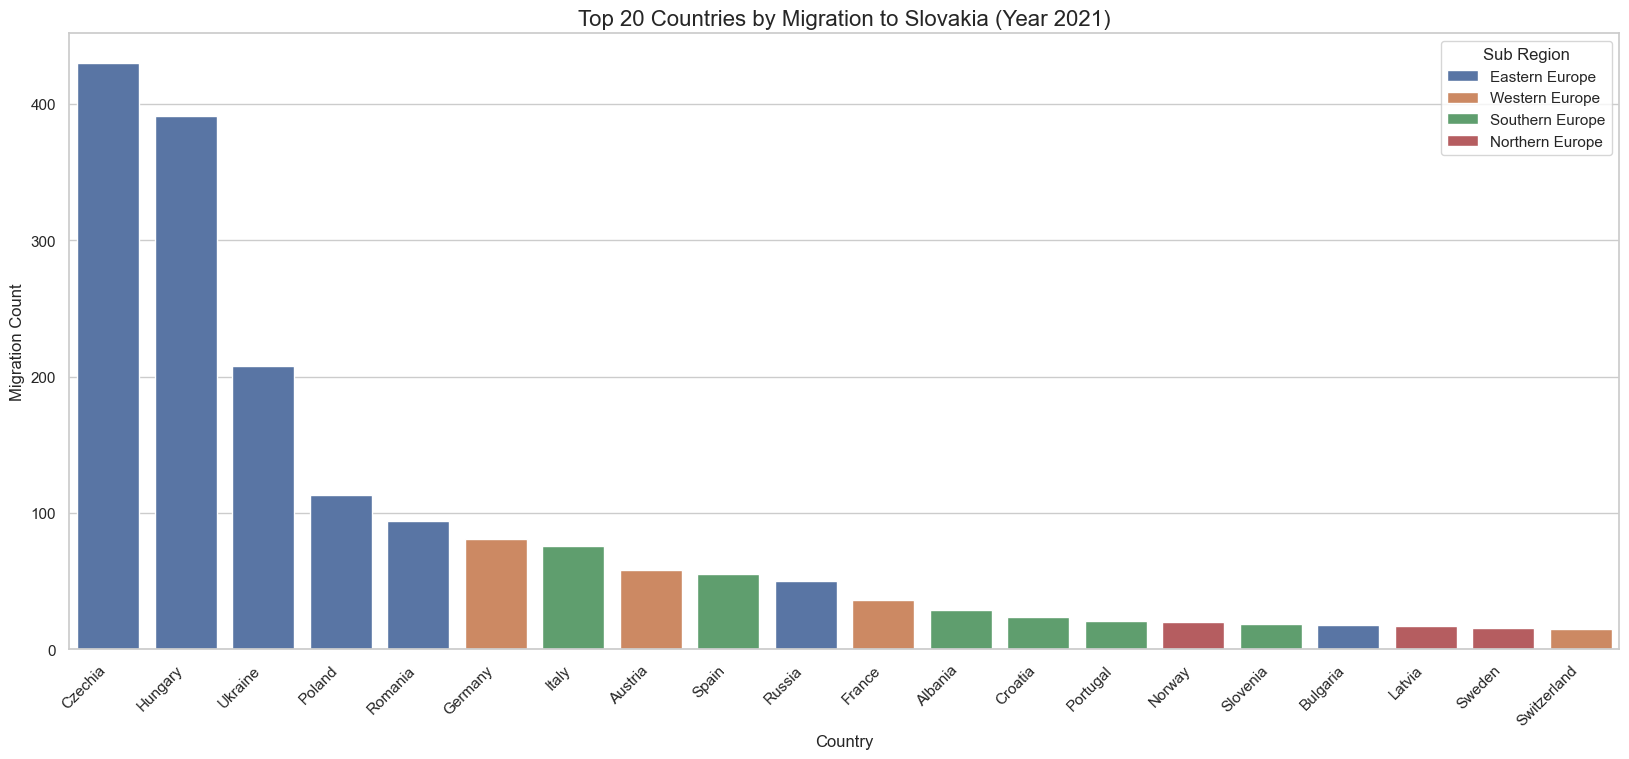

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


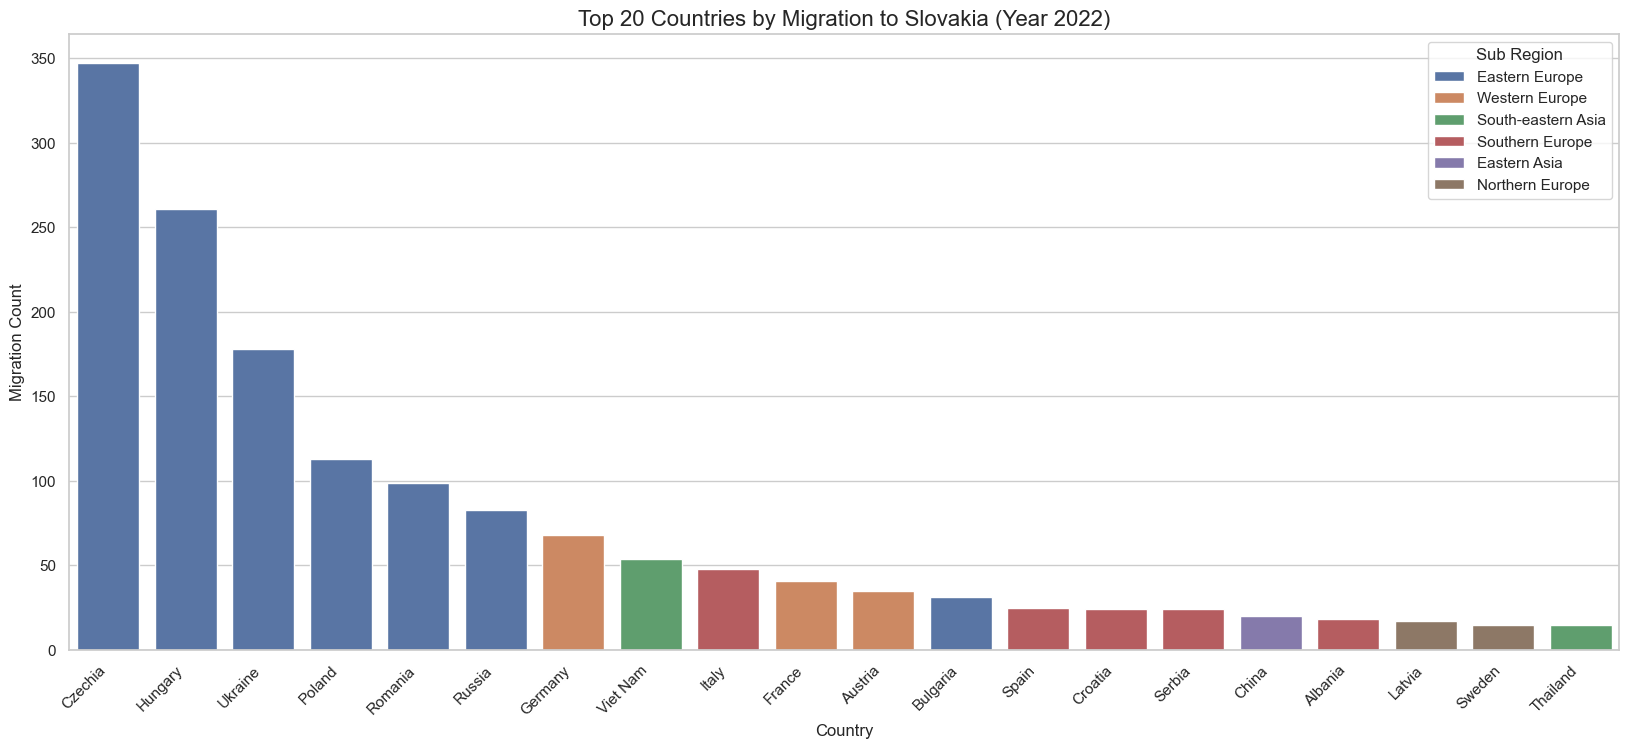

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\240305870.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


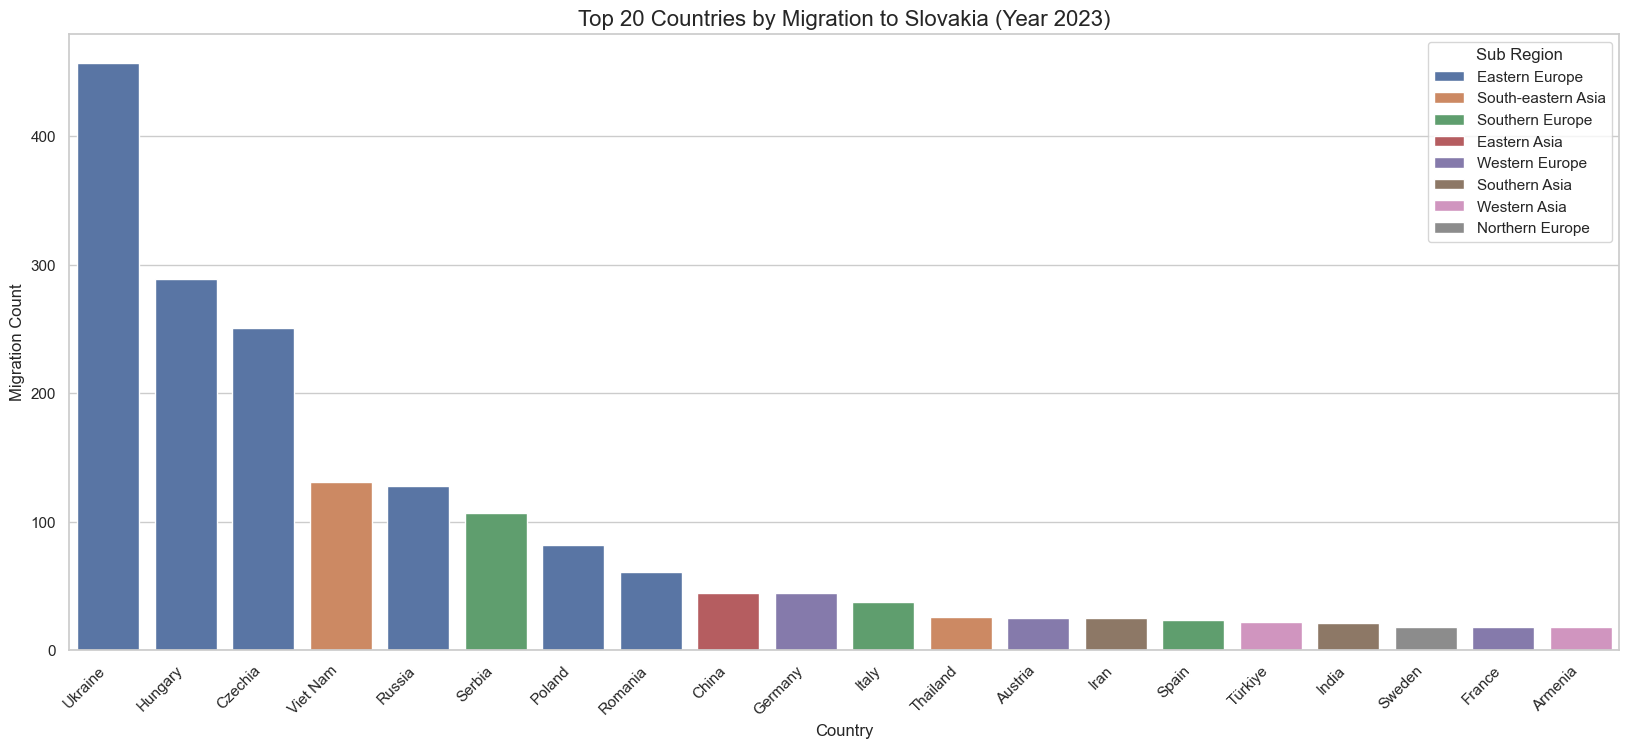

In [7]:
# Generate graphs for each year from 2008 to 2023
filtered_df_no_slovakia = filtered_df[(filtered_df['citizen_country'] != 'Slovakia')]

for year in range(2008, 2024):
    # Filter data for the specific year and 'sex' == 'Total'
    yearly_data = filtered_df_no_slovakia[(filtered_df_no_slovakia['year'] == year)]

    # Group by 'citizen_country' and aggregate 'count' (sum) and 'citizen_sub_region' (first occurrence)
    yearly_grouped = yearly_data.groupby('citizen_country', as_index=False).agg({
        'count': 'sum',
        'citizen_sub_region': 'first'
    })

    # Sort the data in descending order of migration count and select the top 20 countries
    top_20_countries_yearly = yearly_grouped.sort_values(by='count', ascending=False).head(20)

    # Plot the data
    plt.figure(figsize=(20, 8))
    axes = sns.barplot(
        data=top_20_countries_yearly,
        x='citizen_country',
        y='count',
        hue='citizen_sub_region'
    )
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
    axes.set_xlabel('Country', fontsize=12)
    axes.set_ylabel('Migration Count', fontsize=12)
    axes.set_title(f'Top 20 Countries by Migration to Slovakia (Year {year})', fontsize=16)

    axes.legend().set_title("Sub Region")

    # Save the plot
    plt.savefig(f"../../Images/Slovakia/Migration/immigration/top_immigration_{year}.png", bbox_inches='tight')
    plt.show()

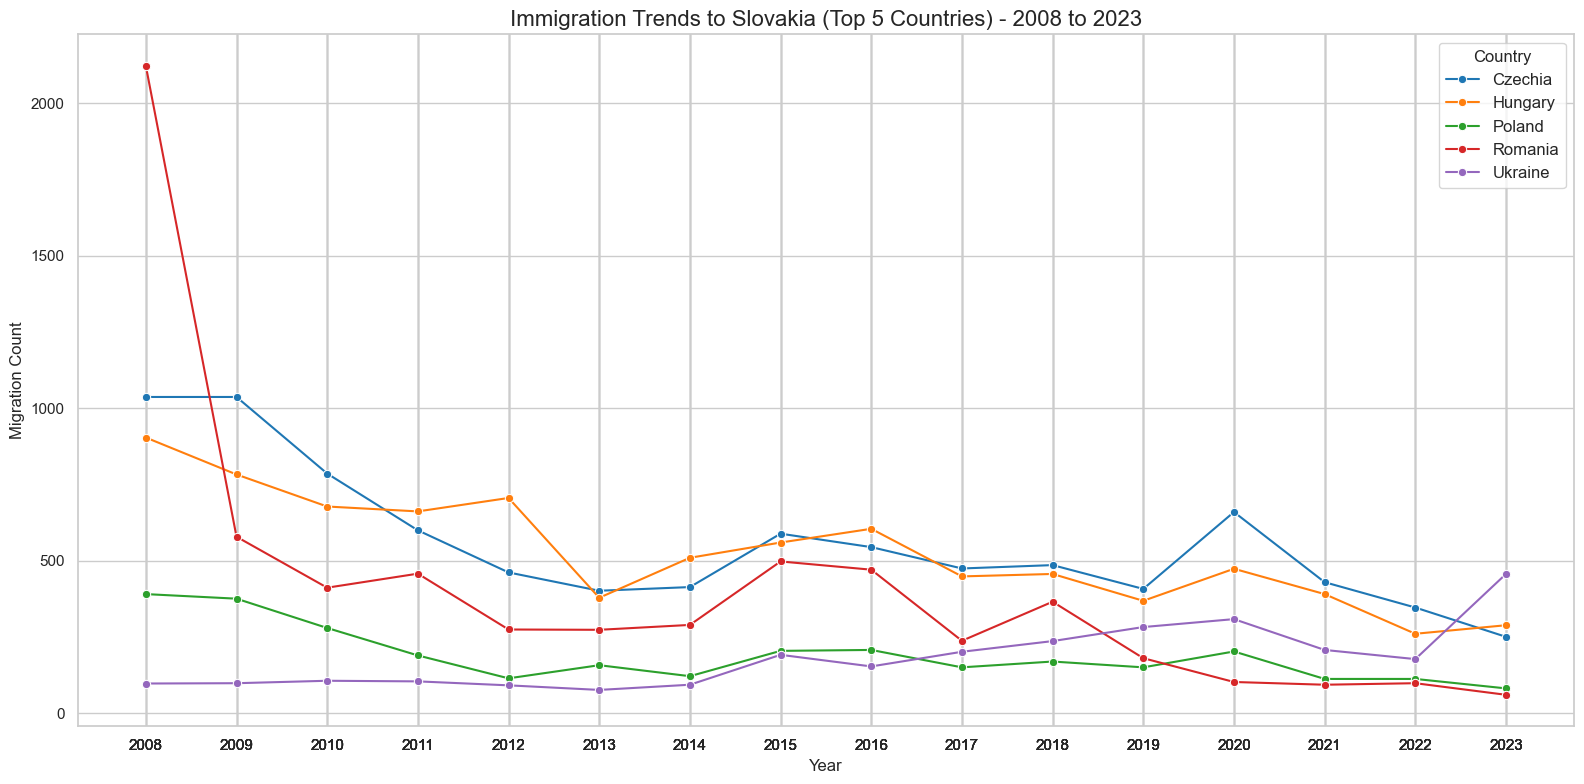

<Figure size 640x480 with 0 Axes>

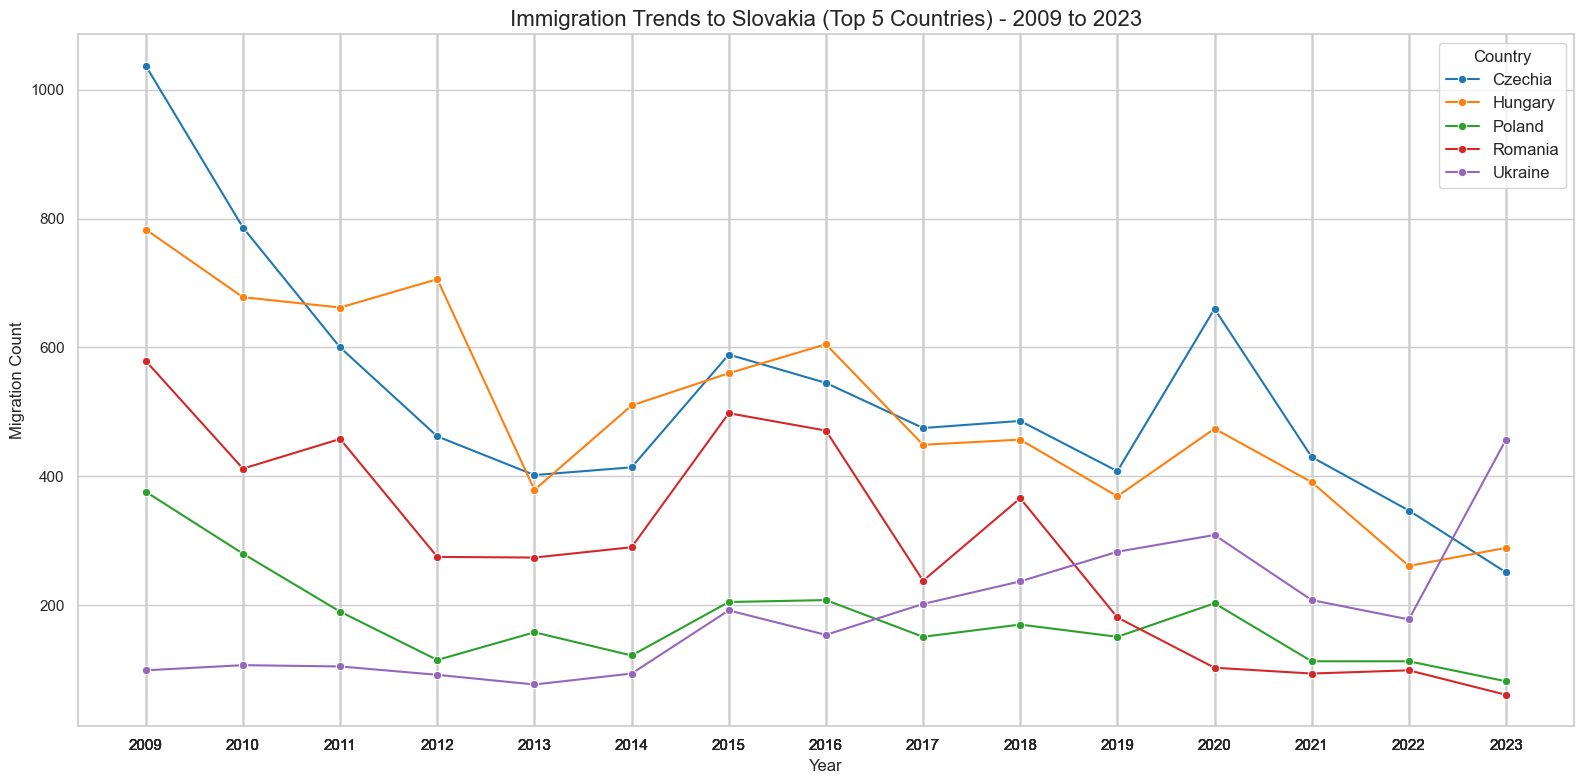

<Figure size 640x480 with 0 Axes>

In [8]:
# Group by 'citizen_country' and 'year', and sum the 'count' column
yearly_migration = filtered_df_no_slovakia.groupby(['citizen_country', 'year'])['count'].sum().reset_index()

# Get the top 5 countries by total migration count
top_countries = (
    yearly_migration.groupby('citizen_country')['count']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter the data for only the top 5 countries
top_data = yearly_migration[yearly_migration['citizen_country'].isin(top_countries)]

# Filter data for 2008 to 2023
data_2008_to_2023 = top_data[(top_data['year'] >= 2008) & (top_data['year'] <= 2023)]

# Filter data for 2009 to 2023
data_2009_to_2023 = top_data[(top_data['year'] >= 2009) & (top_data['year'] <= 2023)]

# Plot the line graph for 2008 to 2023
plt.figure(figsize=(16, 8))
axes = sns.lineplot(  # Assign the plot to 'axes'
    data=data_2008_to_2023,
    x='year',
    y='count',
    hue='citizen_country',
    marker='o',
    palette='tab10'
)

# Add labels and title for 2008 to 2023
axes.set_xlabel('Year', fontsize=12)
axes.set_ylabel('Migration Count', fontsize=12)
axes.set_title('Immigration Trends to Slovakia (Top 5 Countries) - 2008 to 2023', fontsize=16)
axes.legend(title='Country', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.xticks(ticks=data_2008_to_2023['year'])
plt.show()

# Save the plot for 2008 to 2023
plt.savefig("../../Images/Slovakia/Migration/immigration/immigration_trends_2008_2023.png", bbox_inches='tight')

# Plot the line graph for 2009 to 2023
plt.figure(figsize=(16, 8))
axes = sns.lineplot(  # Assign the plot to 'axes'
    data=data_2009_to_2023,
    x='year',
    y='count',
    hue='citizen_country',
    marker='o',
    palette='tab10'
)

# Add labels and title for 2009 to 2023
axes.set_xlabel('Year', fontsize=12)
axes.set_ylabel('Migration Count', fontsize=12)
axes.set_title('Immigration Trends to Slovakia (Top 5 Countries) - 2009 to 2023', fontsize=16)
axes.legend(title='Country', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.xticks(ticks=data_2009_to_2023['year'])
plt.show()

# Save the plot for 2009 to 2023
plt.savefig("../../Images/Slovakia/Migration/immigration/immigration_trends_2009_2023.png", bbox_inches='tight')

# Migration from regions of the world

C:\Users\erik3\AppData\Local\Temp\ipykernel_15764\2911781730.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


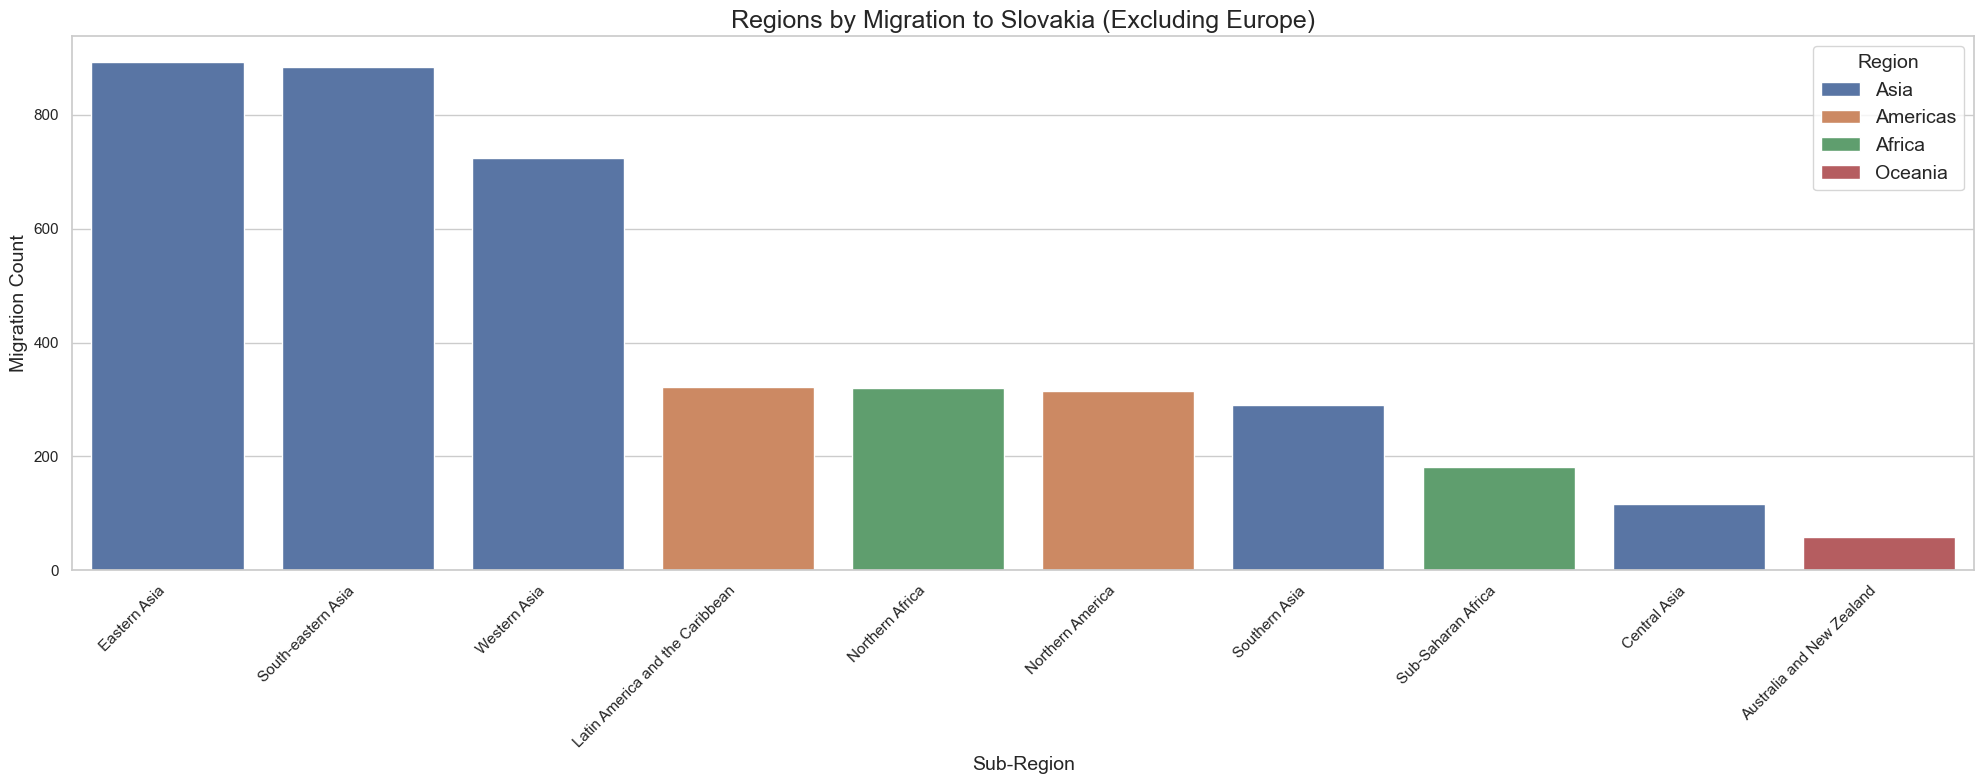

In [9]:
filtered_df_no_europe = filtered_df[filtered_df['citizen_region'] != 'Europe']
region_migration = filtered_df_no_europe.groupby('citizen_sub_region', as_index=False).agg({
    'count': 'sum',
    'citizen_region': 'first'
})
region_migration = region_migration.sort_values(by='count', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(20, 8))
axes = sns.barplot(  # Assign the plot to 'axes'
    data=region_migration,
    x='citizen_sub_region',  # Sub-region names on the x-axis
    y='count',  # Migration count on the y-axis
    hue='citizen_region'  # Color by region
)

# Rotate x-axis labels for better readability
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

# Add labels and title to the plot with larger font sizes
axes.set_xlabel('Sub-Region', fontsize=14)  # Increased font size
axes.set_ylabel('Migration Count', fontsize=14)  # Increased font size
axes.set_title('Regions by Migration to Slovakia (Excluding Europe)', fontsize=18)  # Increased font size

# Customize the legend with a larger font size
legend = axes.legend(title="Region", fontsize=14)  # Increased font size for legend labels
legend.set_title("Region", prop={'size': 14})  # Increased font size for legend title

# Display the plot
plt.tight_layout()
plt.show()

# Save the plot (uncomment the line below if needed)
# plt.savefig("../../Images/Slovakia/Migration/immigration/regions_exc_europe.png", bbox_inches='tight')

### Map of europe

In [ ]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

# Define the draw_choropleth function
def draw_choropleth(data, column, range=None, save_path=None, title="", scale=""):
    if range is not None:
        fig = px.choropleth(
            data, locations=data['citizen_ISO3'], color=column,
            projection="azimuthal equidistant", locationmode='ISO-3',
            range_color=range
        )
    else:
        fig = px.choropleth(
            data, locations=data['citizen_ISO3'], color=column,
            projection="azimuthal equidistant", locationmode='ISO-3',
        )

    fig.update_geos(lonaxis_range=[-20, 40], lataxis_range=[30, 72])
    fig.update_layout(
        height=500,
        margin={"r": 0, "t": 50, "l": 0, "b": 30},
        title={
            'text': title,
            'y': 0.96,  # Position from top (0 to 1)
            'x': 0.5,   # Center the title
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=18)
        }
    )
    if save_path:
        try:
            fig.to_image(save_path, scale=4)
            print("Successfully saved")
        except Exception as e:
            print(f"Could not save PNG: {str(e)}")
            print("Install kaleido with: pip install -U kaleido")
        fig.show()
    fig.show()

# Use the function to draw the choropleth map
draw_choropleth(
    data=country_migration_no_slovakia,
    column='count',
    range=[0, country_migration_no_slovakia['count'].max()],
    title="Immigration to Slovakia by European Countries",
    # save_path="../../Images/Slovakia/Migration/immigration/immi_to_sk_map.png" 
)